In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
X=df.drop('Class',axis=1)
y=df['Class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2)

In [4]:
# using decision tree to find feature importance

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier(random_state=0,max_depth=2).fit(X_train,y_train)

In [16]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06897984, 0.        , 0.08283179,
       0.        , 0.        , 0.84818836, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [15]:
feature_importance = clf.feature_importances_

# Your dataset columns
df_columns = df.columns

# Pair non-zero feature importance values with their corresponding column names
non_zero_feature_importance = {column: importance for column, importance in zip(df_columns, feature_importance) if importance != 0}

# Print the result
for column, importance in non_zero_feature_importance.items():
    print(f"{column}: {importance}")

V12: 0.06897984401388123
V14: 0.0828317938111493
V17: 0.8481883621749695


In [23]:
data=df[['V12','V14','V17','Class']]

In [24]:
data.head()

,V12,V14,V17,Class
0,-0.617801,-0.311169,0.207971,0
1,1.065235,-0.143772,-0.114805,0
2,0.066084,-0.165946,1.109969,0
3,0.178228,-0.287924,-0.684093,0
4,0.538196,-1.119670,-0.237033,0


In [25]:
data['Class'].unique()

array([0, 1], dtype=int64)

In [22]:
import seaborn as sns

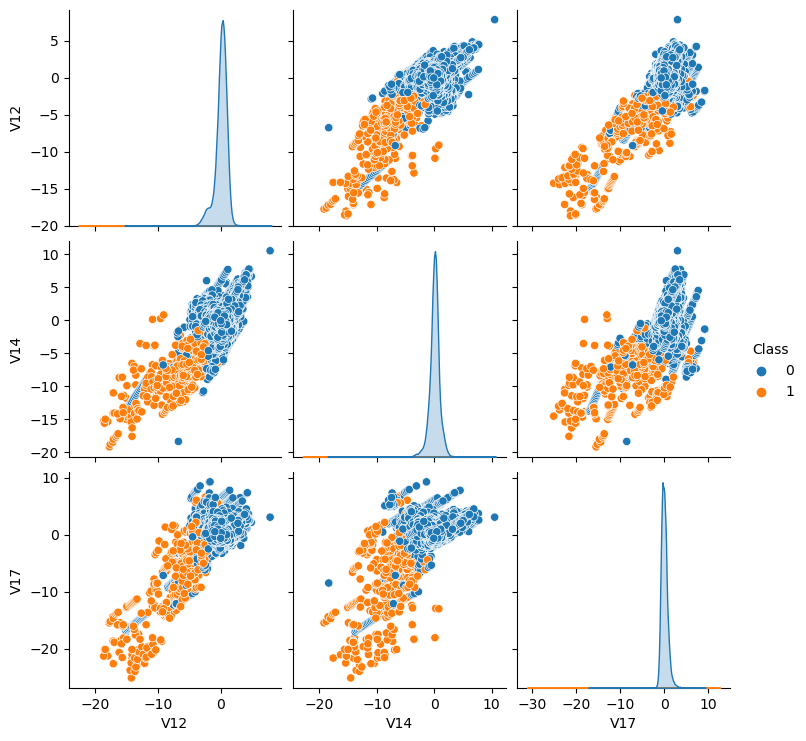

In [26]:
sns.pairplot(data,hue='Class')

In [31]:
data.shape

(284807, 4)

In [33]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.7 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.1/99.7 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.7 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.4/99.7 MB 1.6 MB/s eta 0:01:01
   ---------------------------------------- 0.5/99.7 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.5/99.7 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 1.0/99.7 MB 2.8 MB/s eta 0:00:35
   ------------------------

In [35]:
X=data[['V12','V14','V17']]
y=data['Class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2)

In [34]:
import xgboost as xgb

In [38]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42,max_depth=3)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [39]:
y_pred = xgb_classifier.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [45]:
accuracy

0.9993504441557529

In [46]:
conf_matrix

array([[56854,    18],
       [   19,    71]], dtype=int64)

In [48]:
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.80      0.79      0.79        90

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

